In [1]:
import os
import urllib
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
#load the dataset
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [4]:
some_i = 0
some_digit = X.iloc[some_i]
some_digit_img = some_digit.values.reshape(28, 28)

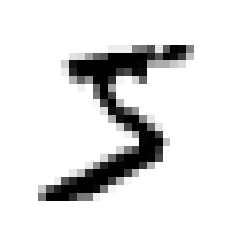

In [5]:
plt.imshow(some_digit_img, cmap='binary')
plt.axis('off')
plt.show()

In [6]:
y = y.astype(np.uint8)
y[some_i]

5

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [31]:
X_train.shape

(60000, 784)

In [8]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [9]:
#training
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([some_digit]) #predicts 5 correctly

c:\users\mehrshad\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [11]:
#let's measure performance
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
#good

array([0.95035, 0.96035, 0.9604 ])

In [12]:
from sklearn.base import BaseEstimator
class Never5(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [13]:
never_5 = Never5()
cross_val_score(never_5, X_train, y_train_5, cv=3, scoring='accuracy')
#oops!

array([0.91125, 0.90855, 0.90915])

In [14]:
#we need F1 metric
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [16]:
print('precision: ',precision_score(y_train_5, y_train_pred))
print('recall: ', recall_score(y_train_5, y_train_pred))
print('F1: ', f1_score(y_train_5, y_train_pred))

precision:  0.8370879772350012
recall:  0.6511713705958311
F1:  0.7325171197343846


In [17]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

In [18]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [19]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

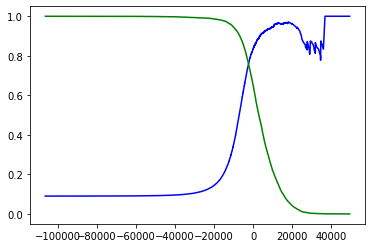

In [20]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

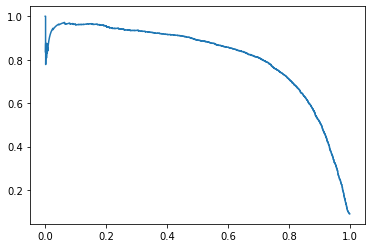

In [21]:
plt.plot(recalls, precisions)

In [22]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [23]:
svm_clf.predict([some_digit])

c:\users\mehrshad\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [24]:
some_digit_scores = svm_clf.decision_function([some_digit])

c:\users\mehrshad\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [25]:
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv= 3)
conf_mx = confusion_matrix(y_train, y_train_pred)

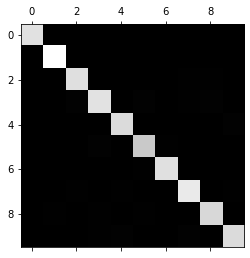

In [26]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

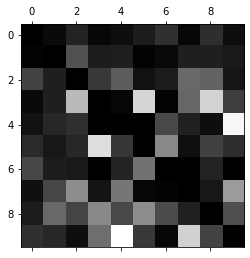

In [91]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [92]:
def logit(t):
    return 1/(1 + np.exp(-t))

In [97]:
def MyLogisticRegression(X, y):
    n = X.shape[1]
    m = X.shape[0]
    #print((n, m))
    theta = np.random.rand(n, 1)
    h = logit(X.dot(theta))
    epochs = 1000
    eta = 0.01
    
    y_new = (y.to_numpy().reshape(m, 1))
    print(y_new)
   
    for epoch in range(epochs):
        grads = (1/m) * X.T.dot(h - y_new)
        theta = theta - eta * grads
        
    return theta
    

In [98]:
theta = MyLogisticRegression(X_train, y_train)

[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]


In [96]:
theta

,0
pixel1,0.050928
pixel2,0.172811
pixel3,0.218639
pixel4,0.401524
pixel5,0.853366
...,...
pixel780,0.451686
pixel781,0.619876
pixel782,0.679971
pixel783,0.883674
